# <center> Data Report for Temperature Change, Floods, and Import/Export Data in India </center> #

<br/><br/>

## A look at the temperature change data in India ##

In [1]:
%pip install systools

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Library Imports

import numpy as np
import pandas as pd

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go

import json

import warnings
warnings.filterwarnings('ignore')

from systemtools.number import parseNumber

sns.set(style='darkgrid')
plt.rcParams["figure.figsize"] = (20,9)

In [3]:
data1= pd.read_csv("data/INDTemperature.csv")
data2= pd.read_csv("data/INDFloods.csv")
data3= pd.read_csv("data/INDImportExport.csv")

In [4]:
data1.head()

,States,Period,1901,1902,1903,1904,1905,1906,1907,1908,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Andaman and Nicobar,Jan,27.68,26.75,26.70,26.02,26.12,27.62,26.78,26.40,...,26.53,26.78,26.83,25.88,26.29,26.80,26.95,26.79,27.30,27.56
1,Andaman and Nicobar,Feb,28.50,26.67,27.54,26.49,27.29,27.40,26.92,26.29,...,26.87,27.00,27.73,26.46,26.75,26.86,26.83,26.61,27.48,27.14
2,Andaman and Nicobar,Mar,27.03,28.09,27.66,27.55,27.89,26.88,27.04,27.59,...,26.39,27.53,27.84,27.54,27.86,28.29,27.78,27.63,27.88,27.90
3,Andaman and Nicobar,Apr,28.52,29.35,29.53,27.72,28.79,29.62,28.75,29.23,...,27.94,28.48,28.73,28.98,28.39,29.74,28.31,28.18,29.39,28.96
4,Andaman and Nicobar,May,28.28,28.25,29.10,28.02,27.80,29.67,27.42,27.70,...,27.81,27.94,28.40,28.74,28.78,28.60,28.39,27.74,29.06,29.28


In [5]:
data2.head()

,Start Date,End Date,Duration(Days),Main Cause,Location,Districts,State,Latitude,Longitude,Severity,Area Affected,Human fatality,Human injured,Human Displaced,Animal Fatality,Description of Casualties/injured,Extent of damage,Event Source,Event Source ID
0,2015-06-20,2015-06-21,1,Heavy rains,NaN,"East Godavari, Srikakulam, Visakhapatnam and W...",ANDHRA PRADESH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,i) Damage to 2000 hectares of crops reported. ...,IMD,NaN
1,2015-11-15,2015-11-23,8,Heavy rains,NaN,"Anantapur, Chittoor, East Godavari, Krishna, N...",ANDHRA PRADESH,NaN,NaN,NaN,NaN,88.0,NaN,NaN,16710.0,88 persons died. 16710 animals perished. (844 ...,i) Extensive damage to Agricultural crops (mor...,IMD,NaN
2,2015-12-22,2015-12-22,0,Heavy rains,NaN,Vishakhapatnam,ANDHRA PRADESH,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4 persons died due to landslips,Landslips,IMD,NaN
3,2015-10-06,2015-10-06,0,Heavy rains,NaN,Parts of Arunachal Pradesh,ARUNACHAL PRADESH,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2 persons died.,NaN,IMD,NaN
4,2015-02-19,2015-02-19,0,Heavy rains,NaN,Parts of Assam,ASSAM,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2 persons died due to landslide,NaN,IMD,NaN


In [6]:
data3.head()

,Country,Export,Import,Total Trade,Trade Balance,Financial Year(start),Financial Year(end)
0,AFGHANISTAN,21.25,10.7,31.95,10.55,1997,1998
1,AFGHANISTAN,12.81,28.14,40.95,-15.33,1998,1999
2,AFGHANISTAN,33.2,21.06,54.26,12.15,1999,2000
3,AFGHANISTAN,25.86,26.59,52.45,-0.73,2000,2001
4,AFGHANISTAN,24.37,17.52,41.89,6.85,2001,2002


In [7]:
# Original Data
data= pd.read_csv("data/INDTemperature.csv")

In [8]:
data

,States,Period,1901,1902,1903,1904,1905,1906,1907,1908,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Andaman and Nicobar,Jan,27.68,26.75,26.70,26.02,26.12,27.62,26.78,26.40,...,26.53,26.78,26.83,25.88,26.29,26.80,26.95,26.79,27.30,27.56
1,Andaman and Nicobar,Feb,28.50,26.67,27.54,26.49,27.29,27.40,26.92,26.29,...,26.87,27.00,27.73,26.46,26.75,26.86,26.83,26.61,27.48,27.14
2,Andaman and Nicobar,Mar,27.03,28.09,27.66,27.55,27.89,26.88,27.04,27.59,...,26.39,27.53,27.84,27.54,27.86,28.29,27.78,27.63,27.88,27.90
3,Andaman and Nicobar,Apr,28.52,29.35,29.53,27.72,28.79,29.62,28.75,29.23,...,27.94,28.48,28.73,28.98,28.39,29.74,28.31,28.18,29.39,28.96
4,Andaman and Nicobar,May,28.28,28.25,29.10,28.02,27.80,29.67,27.42,27.70,...,27.81,27.94,28.40,28.74,28.78,28.60,28.39,27.74,29.06,29.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,West Bengal,Annual,25.35,25.30,25.29,25.08,24.75,25.26,25.13,25.41,...,26.02,25.62,25.47,25.73,25.61,26.07,25.82,25.42,25.73,25.51
591,West Bengal,Winter,18.69,19.72,18.94,19.16,17.93,18.83,19.59,18.87,...,20.01,18.89,19.43,19.80,20.07,19.88,20.36,19.56,19.94,19.03
592,West Bengal,Summer,27.99,28.01,28.17,27.78,26.42,27.81,26.85,28.73,...,28.59,28.48,28.13,28.66,27.89,28.56,27.68,27.62,28.05,27.56
593,West Bengal,Monsoon,28.87,28.63,28.69,28.20,28.68,28.57,28.57,28.70,...,28.88,28.95,28.83,28.78,28.78,29.00,28.89,29.07,29.17,29.02


In [9]:
# Function for zonal-classification of states
def zones(state):
    if state in ['Chandigarh','Delhi','Haryana','Himachal Pradesh','Punjab','Rajasthan']: return 'North'
    elif state in ['Bihar', 'Orissa', 'Jharkhand', 'West Bengal']: return 'East'
    elif state in ['Dadra and Nagar Haveli','Daman and Diu','Goa','Gujarat','Maharashtra']: return 'West'
    elif state in ['Andhra Pradesh','Karnataka','Kerala','Puducherry','Tamil Nadu','Andaman and Nicobar','Lakshadweep']: return 'South'
    elif state in ['Chhattisgarh','Madhya Pradesh','Uttarakhand','Uttar Pradesh']: return 'Central'
    elif state in ['Assam','Sikkim','Nagaland','Meghalaya','Manipur','Mizoram','Tripura','Arunachal Pradesh']: return 'North East'
    else: return None

In [10]:
#creating a copy of data
df=data.copy()

#Calculate basline mean relative to the period 1961-1990
df['Baseline mean']= df.iloc[:,62:92].mean(axis=1).round(2)

#Temp. Change relative to the baseline mean

df= df.melt(id_vars= ['States', 'Period', 'Baseline mean'], var_name= 'Year', value_name= 'temp_change')
df['Year']= df['Year'].astype(int)
df['Zone']= df['States'].apply(zones)
df['temp_change']= df['temp_change']-df['Baseline mean']
df= df[['States', 'Zone', 'Period', 'Year', 'temp_change', 'Baseline mean']]

In [11]:
df

,States,Zone,Period,Year,temp_change,Baseline mean
0,Andaman and Nicobar,South,Jan,1901,1.87,25.81
1,Andaman and Nicobar,South,Feb,1901,2.44,26.06
2,Andaman and Nicobar,South,Mar,1901,0.12,26.91
3,Andaman and Nicobar,South,Apr,1901,0.42,28.10
4,Andaman and Nicobar,South,May,1901,0.59,27.69
...,...,...,...,...,...,...
71395,West Bengal,East,Annual,2020,-0.05,25.56
71396,West Bengal,East,Winter,2020,-0.64,19.67
71397,West Bengal,East,Summer,2020,-0.60,28.16
71398,West Bengal,East,Monsoon,2020,0.46,28.56


In [12]:
df

,States,Zone,Period,Year,temp_change,Baseline mean
0,Andaman and Nicobar,South,Jan,1901,1.87,25.81
1,Andaman and Nicobar,South,Feb,1901,2.44,26.06
2,Andaman and Nicobar,South,Mar,1901,0.12,26.91
3,Andaman and Nicobar,South,Apr,1901,0.42,28.10
4,Andaman and Nicobar,South,May,1901,0.59,27.69
...,...,...,...,...,...,...
71395,West Bengal,East,Annual,2020,-0.05,25.56
71396,West Bengal,East,Winter,2020,-0.64,19.67
71397,West Bengal,East,Summer,2020,-0.60,28.16
71398,West Bengal,East,Monsoon,2020,0.46,28.56


<br/><br/>

#### Trying to see which states suffered the most ####

In [13]:
# Which ten states/UTs suffered the most from temperature change in the last ten years?

df_c= df[ (df.Period=='Annual') & (df.Year.between(2011,2020)) ][['States', 'temp_change']]
df_c= df_c.groupby('States').mean().round(2).nlargest(10, 'temp_change')
df_c.reset_index(inplace=True)

fig= px.bar(df_c, x='States', y='temp_change', text_auto='.2f', 
            title= 'Ten States/UTs which suffered the most from temperature change in the last ten years (2011-2020)',
            color='temp_change',
            color_continuous_scale= 'teal'
           )

fig.update_layout(
    width=1000,
    height=600,
    template='plotly_dark',
    coloraxis_showscale=False,
    title_x= 0.5
    
)
fig.update_traces(textposition='outside')
fig.update_xaxes( title='States/UTs')
fig.update_yaxes( title='Temperature Change (°C)')

fig

<br/><br/>

#### Which states suffered the least in the recent years? ####

In [14]:
# Which ten states/UTs suffered the least from temperature change in the last ten years?

df_c= df[ (df.Period=='Annual') & (df.Year.between(2011,2020)) ][['States', 'temp_change']]
df_c= df_c.groupby('States').mean().round(2).nsmallest(10, 'temp_change')
df_c.reset_index(inplace=True)

fig= px.bar(df_c, x='States', y='temp_change', text_auto='.2f', 
            title= 'Ten States/UTs which suffered the least from temperature change in the last ten years (2011-2020)',
            color='temp_change',
            color_continuous_scale= 'teal'
           )

fig.update_layout(
    width=1000,
    height= 600,
    template='plotly_dark',
    coloraxis_showscale=False,
    title_x= 0.5

)
fig.update_traces(textposition='outside')
fig.update_yaxes( title='Temperature Change (°C)')

fig

<br/><br/>

#### A barplot showing the the effect of Global Warming on India ####

In [15]:
# Temperature change trend in India
fig= px.bar(df[(df.States=='India') & (df.Period=='Annual')],
            x= 'Year',
            y='temp_change',
            title= 'Temperature change in India (1901-2020)',
            color='temp_change',
            color_continuous_scale= 'ice_r',
            range_color=[-1,1.7]
           )

fig.update_layout(
    width=1000,
    height= 600,
    template='plotly_dark',
    coloraxis_showscale=False,
    title_x= 0.5
)

fig.update_xaxes( tickmode='linear',tick0=1901, dtick=10)
fig.update_yaxes( title='Temperature Change (°C)')

fig

<br/><br/>

#### Season Wise Temperature Change in India through the Years ####

In [16]:
df0= df[ (df.States=='India') & (df.Year>1960)]
df1= df0[df0.Period=='Winter']
df2= df0[df0.Period=='Summer']
df3= df0[df0.Period=='Monsoon']
df4= df0[df0.Period=='Post Monsoon']

fig = go.Figure()
fig.add_trace(go.Scatter(x=df1.Year, y=df1.temp_change,
                    mode='lines',
                    name='Winter'))
fig.add_trace(go.Scatter(x=df2.Year, y=df2.temp_change,
                    mode='markers',
                    name='Summer'))
fig.add_trace(go.Scatter(x=df3.Year, y=df3.temp_change,
                    mode='lines', 
                    name='Monsoon'))
fig.add_trace(go.Scatter(x=df4.Year, y=df4.temp_change,
                    mode='markers', 
                    name='Post Monsoon'))

fig.add_annotation(
    x=48,
    y=1.97,
    xref="x",
    yref="y",
    text="Hottest Winter (2009, 1.97)",
    xanchor= 'right',
    showarrow=True,
    font=dict(
            family="Courier New, monospace",
            size=16,
            color="#ffffff"
            ),
    align="center",
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="#636363",
    ax=-20,
    ay=10,
    bordercolor="#c7c7c7",
    borderwidth=2,
    borderpad=4,
    bgcolor="#ff7f0e",
    opacity=1
)

fig.add_annotation(
    x=49,
    y=1.96,
    xref="x",
    yref="y",
    text="Hottest Summer (2010, 1.96)",
    xanchor= 'center',
    showarrow=True,
    font=dict(
            family="Courier New, monospace",
            size=16,
            color="#ffffff"
            ),
    align="center",
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="#636363",
    ax=-15,
    ay=-30,
    bordercolor="#c7c7c7",
    borderwidth=2,
    borderpad=4,
    bgcolor="#ff7f0e",
    opacity=1
)


fig.update_layout(
    width=1000,
    height= 600,
    template='seaborn',
    paper_bgcolor="rgb(234, 234, 242)",
    title='Season-wise temperature change in India (1961-2020)',
    title_x=0.5,
    title_y=0.95,
    
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ) 
)

fig.update_xaxes(type='category',title='Years')
fig.update_yaxes(title='Temperature Change (°C)')

fig.show()

<br/><br/>

## A look at the Import and Export Dataset ##

In [17]:
india_export_import = pd.read_csv('data/INDImportExport.csv')
india_export_import.head()

,Country,Export,Import,Total Trade,Trade Balance,Financial Year(start),Financial Year(end)
0,AFGHANISTAN,21.25,10.7,31.95,10.55,1997,1998
1,AFGHANISTAN,12.81,28.14,40.95,-15.33,1998,1999
2,AFGHANISTAN,33.2,21.06,54.26,12.15,1999,2000
3,AFGHANISTAN,25.86,26.59,52.45,-0.73,2000,2001
4,AFGHANISTAN,24.37,17.52,41.89,6.85,2001,2002


In [18]:
india_export_import.shape

(5994, 7)

In [19]:
india_export_import.dropna(inplace = True)

In [20]:
india_export_import.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5408 entries, 0 to 5993
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                5408 non-null   object
 1   Export                 5408 non-null   object
 2   Import                 5408 non-null   object
 3   Total Trade            5408 non-null   object
 4   Trade Balance          5408 non-null   object
 5   Financial Year(start)  5408 non-null   int64 
 6   Financial Year(end)    5408 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 338.0+ KB


In [21]:
india_export_import.describe()

,Financial Year(start),Financial Year(end)
count,5408.000000,5408.000000
mean,2009.974852,2010.974852
std,7.290310,7.290310
min,1997.000000,1998.000000
25%,2004.000000,2005.000000
50%,2010.000000,2011.000000
75%,2016.000000,2017.000000
max,2022.000000,2023.000000


In [22]:
india_export_import.columns

Index(['Country', 'Export', 'Import', 'Total Trade', 'Trade Balance',
       'Financial Year(start)', 'Financial Year(end)'],
      dtype='object')

In [23]:
india_export_import.head()

,Country,Export,Import,Total Trade,Trade Balance,Financial Year(start),Financial Year(end)
0,AFGHANISTAN,21.25,10.7,31.95,10.55,1997,1998
1,AFGHANISTAN,12.81,28.14,40.95,-15.33,1998,1999
2,AFGHANISTAN,33.2,21.06,54.26,12.15,1999,2000
3,AFGHANISTAN,25.86,26.59,52.45,-0.73,2000,2001
4,AFGHANISTAN,24.37,17.52,41.89,6.85,2001,2002


In [24]:
india_export_import['Country'].value_counts()

Country
AFGHANISTAN           26
LITHUANIA             26
MACEDONIA             26
MADAGASCAR            26
MALAWI                26
                      ..
CHANNEL IS             4
Petroleum Products     3
PACIFIC IS             1
CANARY IS              1
GUERNSEY               1
Name: count, Length: 243, dtype: int64

In [25]:
india_usa = india_export_import[india_export_import['Country']=='U S A']
india_usa.head()

,Country,Export,Import,Total Trade,Trade Balance,Financial Year(start),Financial Year(end)
5596,U S A,"6,735.40","3,714.18","10,449.58","3,021.22",1997,1998
5597,U S A,"7,199.59","3,640.25","10,839.84","3,559.34",1998,1999
5598,U S A,"8,395.61","3,560.22","11,955.83","4,835.39",1999,2000
5599,U S A,"9,305.12","3,015.00","12,320.12","6,290.12",2000,2001
5600,U S A,"8,513.34","3,149.62","11,662.96","5,363.73",2001,2002


In [26]:
india_usa['Export'] = india_usa['Export'].str.replace(',','').astype(float)
india_usa['Import'] = india_usa['Import'].str.replace(',','').astype(float)
india_usa['Total Trade'] = india_usa['Total Trade'].str.replace(',','').astype(float)
india_usa['Trade Balance'] = india_usa['Trade Balance'].str.replace(',','').astype(float)

<br/><br/>

#### Import and Export volume between IND and USA through the years ####

<function matplotlib.pyplot.show(close=None, block=None)>

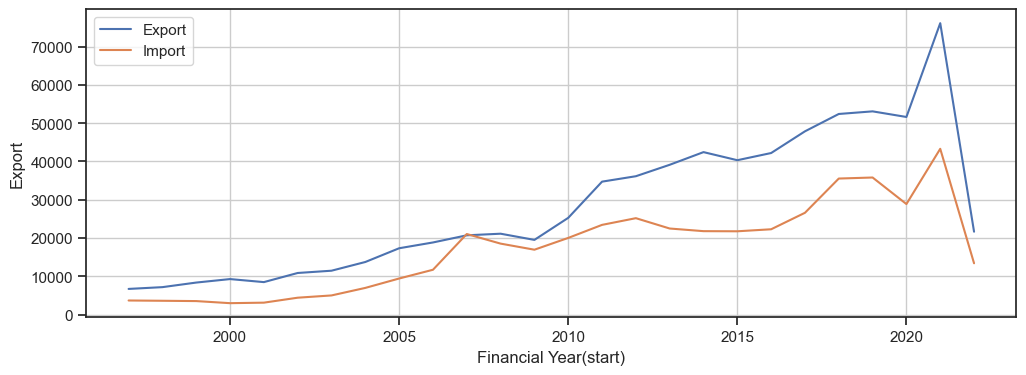

In [27]:
plt.figure(figsize=(12, 4)) 
sns.set_style("ticks")
sns.lineplot(data = india_usa.iloc[:,1:-1], x='Financial Year(start)', y='Export', label = 'Export')
sns.lineplot(data = india_usa.iloc[:,1:-1], x='Financial Year(start)', y='Import', label = 'Import')
plt.grid(True)
plt.show

<br/><br/>

#### A barplot showing the trade balance between IND and USA ####

<function matplotlib.pyplot.show(close=None, block=None)>

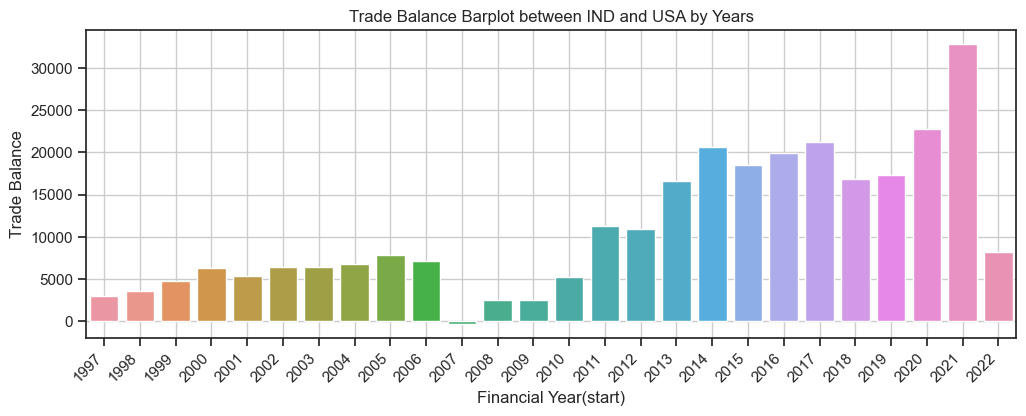

In [44]:
plt.figure(figsize=(12, 4)) 
ax = sns.barplot(data = india_usa.iloc[:,1:-1], x='Financial Year(start)', y='Trade Balance', label = 'Trade Balance')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Trade Balance Barplot between IND and USA by Years')
plt.grid(True)
plt.show

<br/><br/>

#### A barplot showing the total trade between IND and USA ####

<function matplotlib.pyplot.show(close=None, block=None)>

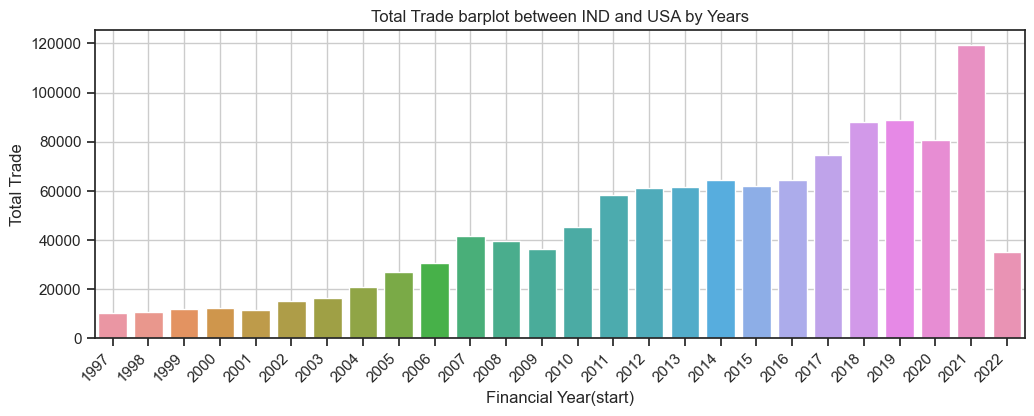

In [29]:
plt.figure(figsize=(12, 4)) 
ax = sns.barplot(data = india_usa.iloc[:,1:-1], x='Financial Year(start)', y='Total Trade', label = 'Total Trade')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Total Trade barplot between IND and USA by Years')
plt.grid(True)
plt.show

<br/><br/>

#### Total Import and Export between IND and USA ####

In [30]:
india_usa_total_trade = india_usa['Total Trade'].sum()

In [31]:
df = pd.read_csv("data/INDImportExport.csv")

In [32]:
COUNTRY = 'U S A'

df_de = df[ df['Country'] == COUNTRY ]

df_de['Export'] = df_de['Export'].apply(lambda x: parseNumber(x)) 
df_de['Import'] = df_de['Import'].apply(lambda x: parseNumber(x))
df_de['Total Trade'] = df_de['Total Trade'].apply(lambda x: parseNumber(x)) 
df_de['Trade Balance'] = df_de['Trade Balance'].apply(lambda x: parseNumber(x)) 
df_de['year'] = df_de['Financial Year(start)'].astype(str) + '-' + df_de['Financial Year(end)'].astype(str)

#Just check if de trade_balance is correct
#df_br['trade_balance_check'] = df_br['Export'] - df_br['Import']

cols = ['Country','Export', 'Import','total_trade','trade_balance', 'Year(start)', 'Year(end)', 'year']
df_de.columns = map(str.lower, cols)

In [33]:
df_de.head()

,country,export,import,total_trade,trade_balance,year(start),year(end),year
5596,U S A,6735.40,3714.18,10449.58,3021.22,1997,1998,1997-1998
5597,U S A,7199.59,3640.25,10839.84,3559.34,1998,1999,1998-1999
5598,U S A,8395.61,3560.22,11955.83,4835.39,1999,2000,1999-2000
5599,U S A,9305.12,3015.00,12320.12,6290.12,2000,2001,2000-2001
5600,U S A,8513.34,3149.62,11662.96,5363.73,2001,2002,2001-2002


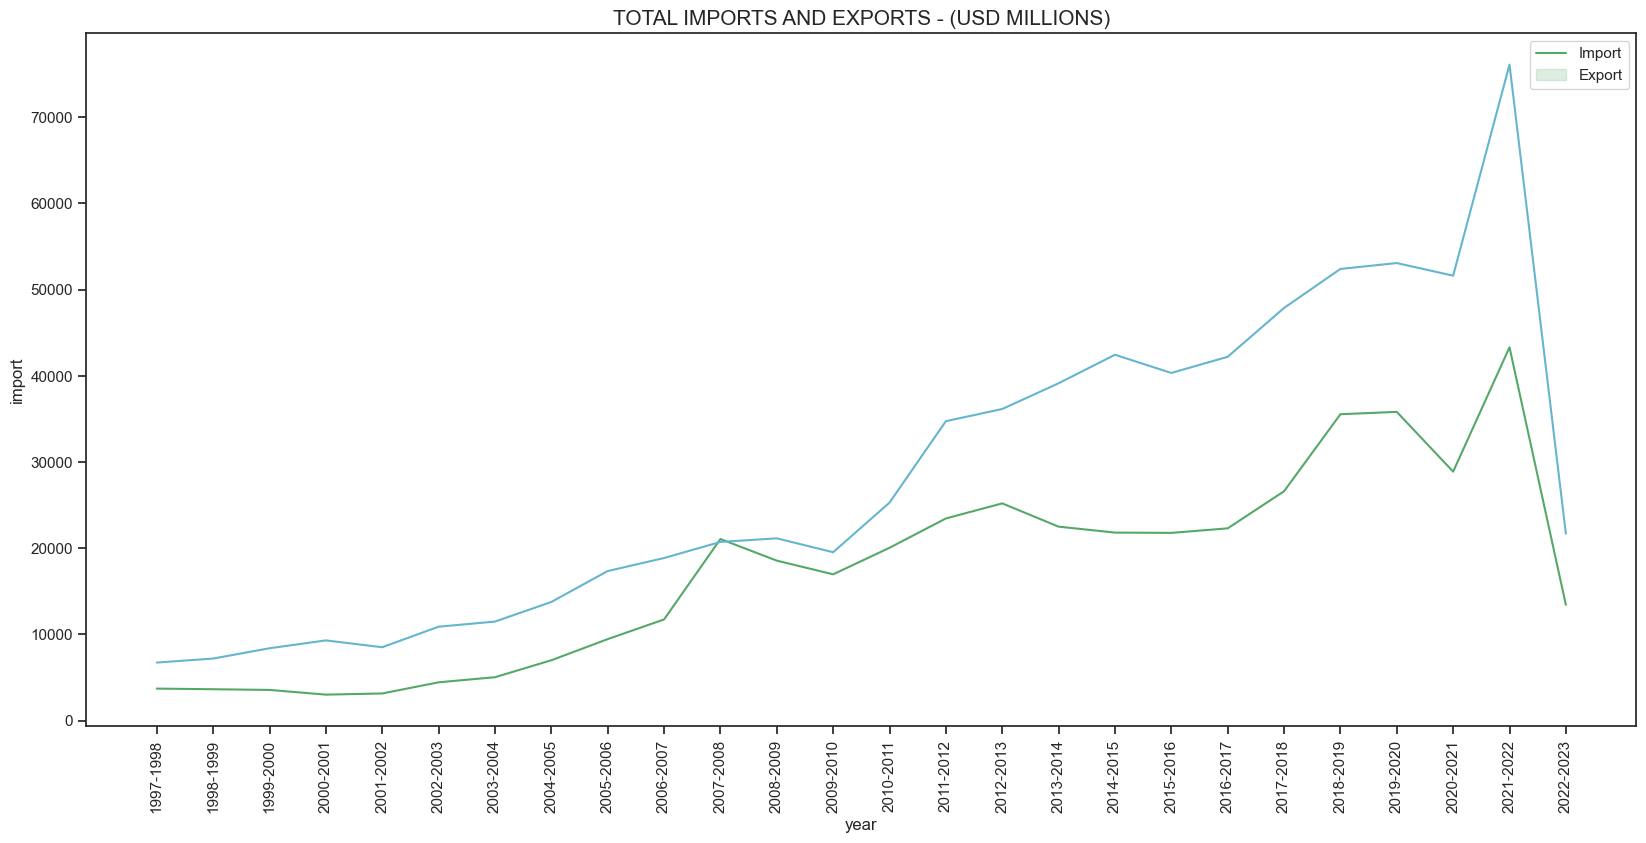

In [34]:
sns.lineplot(x='year', y ='import', data=df_de, color = 'g', markers=["o", "o"]);
sns.lineplot(x='year', y ='export', data=df_de, color  = 'c');
plt.title('TOTAL IMPORTS AND EXPORTS - (USD MILLIONS)', size = 15);
plt.xticks(rotation=90);
plt.legend(['Import', 'Export'])

<br/><br/>

#### Visualizing trade balance between India and USA ####

In [35]:
color = ['g' if c >= 0 else 'r' for c in df_de['trade_balance']]

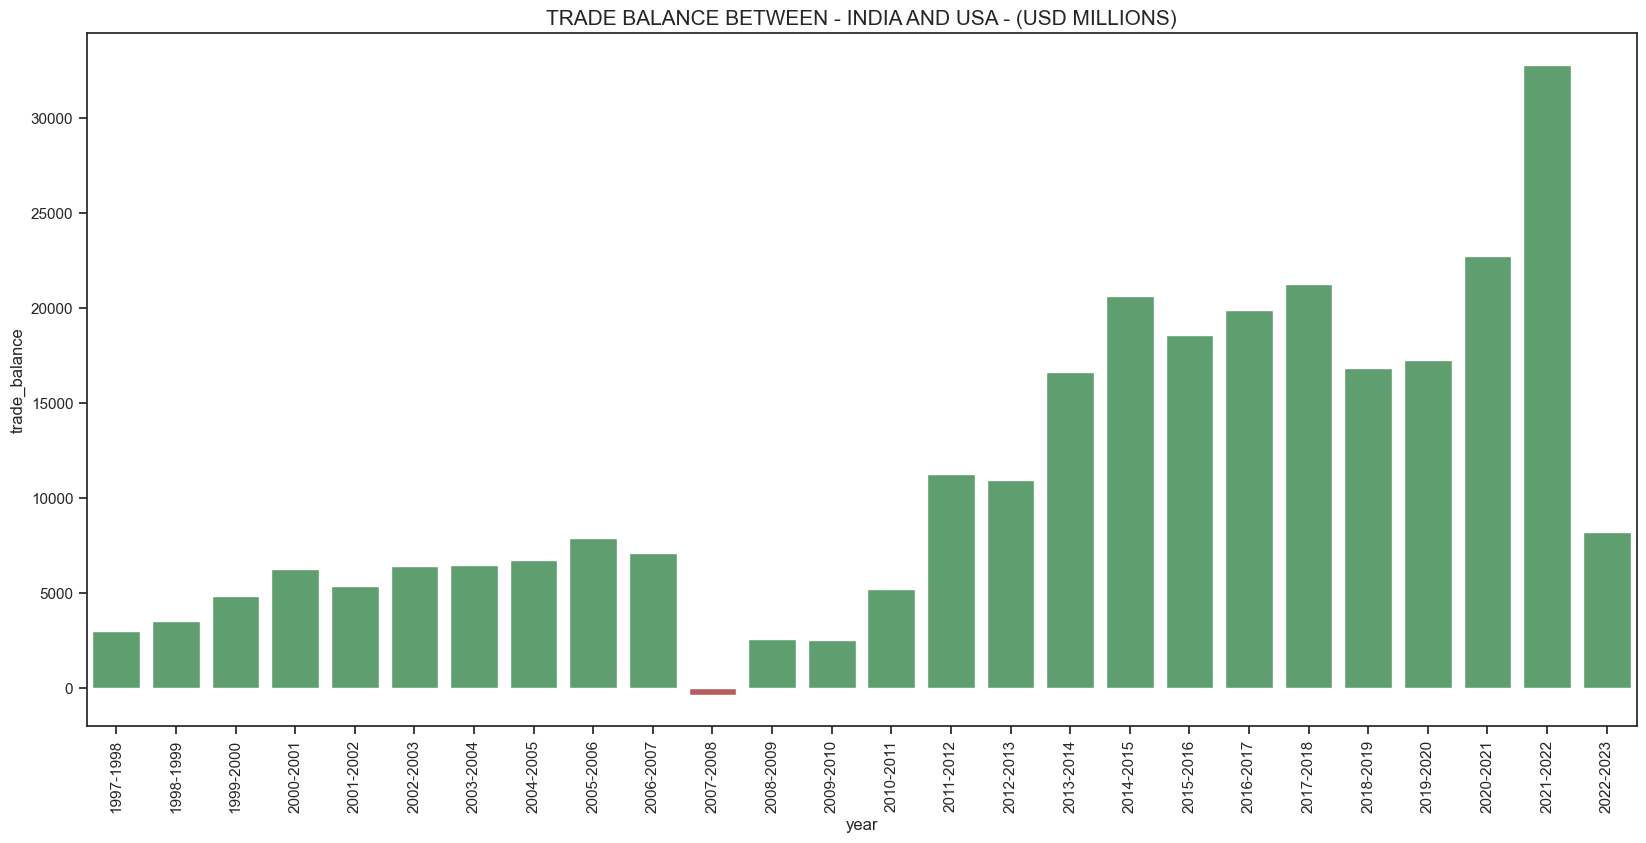

In [36]:
sns.barplot(x='year', y ='trade_balance', data=df_de, palette = color);
plt.title('TRADE BALANCE BETWEEN - INDIA AND USA - (USD MILLIONS)', size = 15);
plt.xticks(rotation=90);

<br/><br/>

## A look at the Floods dataset ##

In [37]:
# Load the floods dataset
floods_df = pd.read_csv(f'data/INDFloods.csv')
floods_df.head()

,Start Date,End Date,Duration(Days),Main Cause,Location,Districts,State,Latitude,Longitude,Severity,Area Affected,Human fatality,Human injured,Human Displaced,Animal Fatality,Description of Casualties/injured,Extent of damage,Event Source,Event Source ID
0,2015-06-20,2015-06-21,1,Heavy rains,NaN,"East Godavari, Srikakulam, Visakhapatnam and W...",ANDHRA PRADESH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,i) Damage to 2000 hectares of crops reported. ...,IMD,NaN
1,2015-11-15,2015-11-23,8,Heavy rains,NaN,"Anantapur, Chittoor, East Godavari, Krishna, N...",ANDHRA PRADESH,NaN,NaN,NaN,NaN,88.0,NaN,NaN,16710.0,88 persons died. 16710 animals perished. (844 ...,i) Extensive damage to Agricultural crops (mor...,IMD,NaN
2,2015-12-22,2015-12-22,0,Heavy rains,NaN,Vishakhapatnam,ANDHRA PRADESH,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4 persons died due to landslips,Landslips,IMD,NaN
3,2015-10-06,2015-10-06,0,Heavy rains,NaN,Parts of Arunachal Pradesh,ARUNACHAL PRADESH,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2 persons died.,NaN,IMD,NaN
4,2015-02-19,2015-02-19,0,Heavy rains,NaN,Parts of Assam,ASSAM,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2 persons died due to landslide,NaN,IMD,NaN


In [38]:
# Display information about the DataFrame
print(floods_df.info())

# Display the first few rows of the DataFrame again
print(floods_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Start Date                         1027 non-null   object 
 1   End Date                           1027 non-null   object 
 2   Duration(Days)                     1027 non-null   object 
 3   Main Cause                         905 non-null    object 
 4   Location                           276 non-null    object 
 5   Districts                          464 non-null    object 
 6   State                              464 non-null    object 
 7   Latitude                           325 non-null    float64
 8   Longitude                          325 non-null    float64
 9   Severity                           262 non-null    float64
 10  Area Affected                      262 non-null    float64
 11  Human fatality                     605 non-null    float

In [39]:
# Convert Start Date and End Date to datetime
floods_df['Start Date'] = pd.to_datetime(floods_df['Start Date'], errors='coerce')
floods_df['End Date'] = pd.to_datetime(floods_df['End Date'], errors='coerce')

# Extract Year from Start Date
floods_df['Year'] = floods_df['Start Date'].dt.year

<br/><br/>

#### Number of Flood Events per Year ####

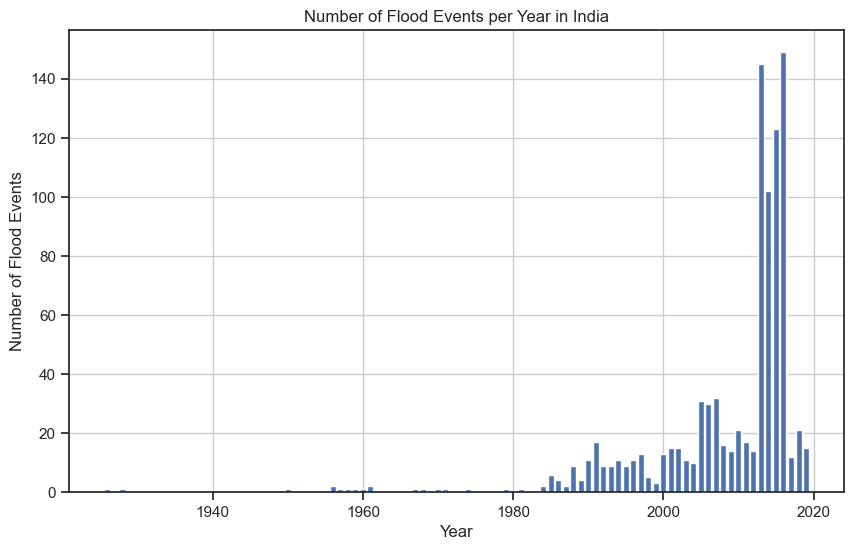

In [40]:

plt.figure(figsize=(10, 6))
floods_per_year = floods_df['Year'].value_counts().sort_index()
plt.bar(floods_per_year.index, floods_per_year.values)
plt.title('Number of Flood Events per Year in India')
plt.xlabel('Year')
plt.ylabel('Number of Flood Events')
plt.grid(True)
plt.show()

<br/><br/>

#### Number of Events during the Years ####

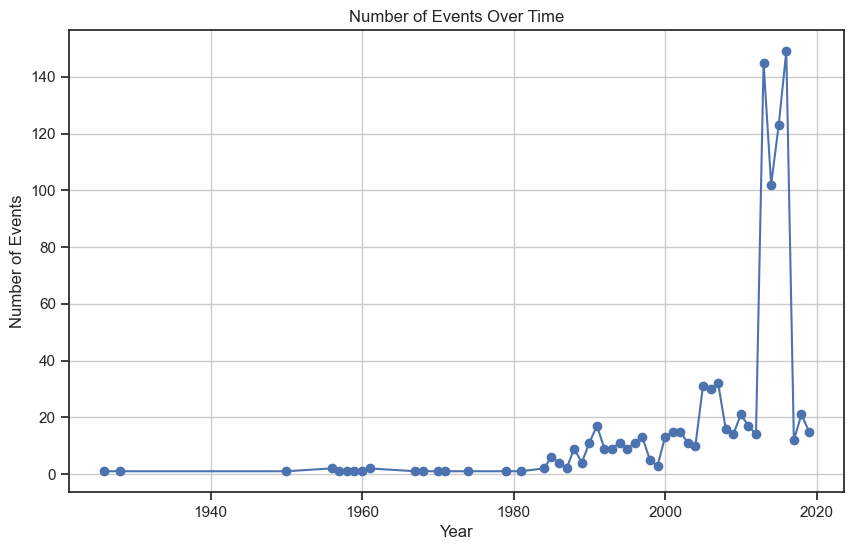

In [41]:
# Convert 'Start Date' and 'End Date' columns to datetime
floods_df['Start Date'] = pd.to_datetime(floods_df['Start Date'])
floods_df['End Date'] = pd.to_datetime(floods_df['End Date'])

# Create a line plot showing the number of events over time
plt.figure(figsize=(10, 6))
floods_df['Start Date'].dt.year.value_counts().sort_index().plot(marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.title('Number of Events Over Time')
plt.grid(True)
plt.show()


<br/><br/>

#### Average Duration of Events through the Years ####

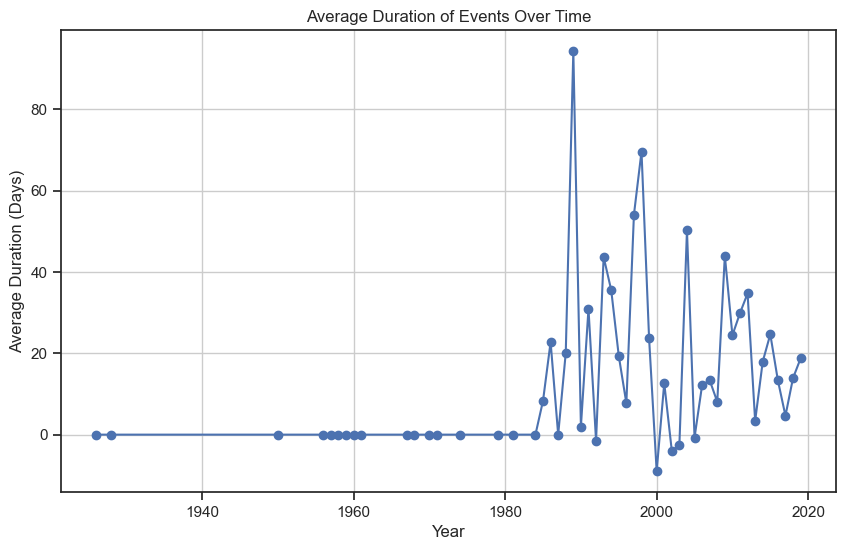

In [42]:
# Calculate duration of each event
floods_df['Duration'] = (floods_df['End Date'] - floods_df['Start Date']).dt.days

# Create a line plot showing the average duration of events over time
plt.figure(figsize=(10, 6))
floods_df.groupby(floods_df['Start Date'].dt.year)['Duration'].mean().plot(marker='o')
plt.xlabel('Year')
plt.ylabel('Average Duration (Days)')
plt.title('Average Duration of Events Over Time')
plt.grid(True)
plt.show()


<br/><br/>

#### A map visualising the location of Events ####

In [43]:
# 5. Geographical Distribution of Floods
fig = px.scatter_geo(floods_df,
                     lat='Latitude',
                     lon='Longitude',
                     hover_name='Location',
                     hover_data=['State', 'Severity', 'Duration(Days)', 'Human fatality'],
                     color='Severity',
                     title='Geographical Distribution of Floods')
fig.update_layout(
    title_x=0.5,
    geo=dict(
        scope='asia',
        projection_type='equirectangular',
        showland=True,
    )
)
fig.show()

### Correlation Analysis ###

#### Loading Data ####

In [46]:
import pandas as pd

# Load the datasets
temperature_data = pd.read_csv('data/INDTemperature.csv')
flood_data = pd.read_csv('data/INDFloods.csv')
trade_data = pd.read_csv('data/INDImportExport.csv')


#### Preparing Data ####

In [47]:
# Calculate annual mean temperature
temperature_data['Year'] = pd.to_datetime(temperature_data['Date']).dt.year
annual_temperature = temperature_data.groupby('Year')['Temperature'].mean().reset_index()
annual_temperature.columns = ['Year', 'AnnualMeanTemperature']

# Extract year from flood event dates
flood_data['Year'] = pd.to_datetime(flood_data['Event Start Date']).dt.year
annual_floods = flood_data.groupby('Year').size().reset_index(name='FloodCount')

# Extract year from flood event dates
flood_data['Year'] = pd.to_datetime(flood_data['Event Start Date']).dt.year
annual_floods = flood_data.groupby('Year').size().reset_index(name='FloodCount')

# Replace 'till now' with '2023' if not already done
trade_data = trade_data.replace('till now', '2023')

# Ensure the trade data is in numeric form and aggregate by year if monthly
trade_data['Year'] = pd.to_datetime(trade_data['Date']).dt.year
annual_trade = trade_data.groupby('Year')['Import (USD Million)', 'Export (USD Million)'].sum().reset_index()

KeyError: 'Date'

#### Merging Data ####

In [45]:
# Merge datasets on 'Year'
merged_data = pd.merge(annual_temperature, annual_floods, on='Year', how='left')
merged_data = pd.merge(merged_data, annual_trade, on='Year', how='left')

NameError: name 'flood_data' is not defined

#### Calculation of Correlation and Create Plots ####

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = merged_data.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Climate Data and Trade Volumes')
plt.show()

#### Scatter Plots for Specific Correlation ####

In [ ]:
# Scatter plot: Annual Mean Temperature vs. Export Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='AnnualMeanTemperature', y='Export (USD Million)')
plt.title('Annual Mean Temperature vs. Export Volume')
plt.xlabel('Annual Mean Temperature (°C)')
plt.ylabel('Export Volume (USD Million)')
plt.show()

# Scatter plot: Flood Count vs. Export Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='FloodCount', y='Export (USD Million)')
plt.title('Flood Count vs. Export Volume')
plt.xlabel('Flood Count')
plt.ylabel('Export Volume (USD Million)')
plt.show()

# Scatter plot: Annual Mean Temperature vs. Import Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='AnnualMeanTemperature', y='Import (USD Million)')
plt.title('Annual Mean Temperature vs. Import Volume')
plt.xlabel('Annual Mean Temperature (°C)')
plt.ylabel('Import Volume (USD Million)')
plt.show()

# Scatter plot: Flood Count vs. Import Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='FloodCount', y='Import (USD Million)')
plt.title('Flood Count vs. Import Volume')
plt.xlabel('Flood Count')
plt.ylabel('Import Volume (USD Million)')
plt.show()